In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Functions as f

1. Read data and shuffle the rows in the raw data matrix:

In [2]:
data = pd.read_csv('data/banknote_authentication.csv').to_numpy()
np.random.shuffle(data)

2. Divide the data into suitable sized train and test set

In [3]:
splitting_index = int(len(data) * 0.8)
X_train, X_test = data[:splitting_index, :4], data[splitting_index:, :4]
y_train, y_test = data[:splitting_index, 4], data[splitting_index:, 4]

3. Normalize the training data and train a linear logistic regression model using gradient
descent. Print the hyperparameters alpha and N(iter) and plot the cost function J(beta) as a
function over iterations.


Text(0, 0.5, 'Cost J')

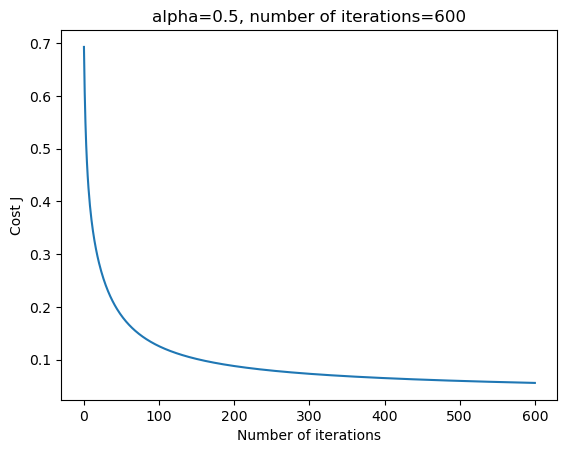

In [8]:

Xn = f.feature_normalization(X_train)
Xe = np.array([np.ones(Xn.shape[0]), Xn[:, 0], Xn[:, 1], Xn[:, 2], Xn[:, 3]]).T
N_iter = 600
alpha = 0.5
betas, costs = f.gradient_descent_logistic(Xe, y_train, alpha, N_iter)
beta = betas[-1]
# plotting the cost function to show the decrease
plt.plot(range(N_iter + 1), costs)
plt.title(f"alpha={0.5}" f", number of iterations={N_iter}")
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

4.  What is the training error (number of non-correct classifications in the training data) and
the training accuracy (percentage of correct classifications) for your model?


In [5]:
Xn = f.feature_normalization(X_train)
Xe = np.array([np.ones(Xn.shape[0]), Xn[:, 0], Xn[:, 1], Xn[:, 2], Xn[:, 3]]).T
training_err = f.training_errors(Xe, beta, y_train)
total_samples = len(X_train)
acc = (total_samples - training_err) / total_samples
acc_percentage = round(acc * 100, 1)
print(f"Amount of training errors in the iteration: {training_err}" f", accuracy: {acc_percentage}%" f", total samples: {total_samples}")

Amount of training errors in the iteration: 16, accuracy: 98.5%, total samples: 1096


After repeated shuffling of the training data and running the task four, the amount of training errors between each iteration varies
from 18 to 24, and the accuracy does not go bellow 97,9 percent.

5. What is the number of test error and the test accuracy for your model?


In [6]:
Xn = f.feature_normalization(X_test)
Xe = np.array([np.ones(Xn.shape[0]), Xn[:, 0], Xn[:, 1], Xn[:, 2], Xn[:, 3]]).T
training_err = f.training_errors(Xe, beta, y_test)
total_samples = len(X_test)
acc = (total_samples - training_err) / total_samples
acc_percentage = round(acc * 100, 1)
print(f"Amount of training errors in the iteration: {training_err}" f", accuracy: {acc_percentage}%" f", total samples: {total_samples}")

Amount of training errors in the iteration: 9, accuracy: 96.7%, total samples: 275


After repeated shuffling of the data and running the task five, the amount of test errors seems to vary between 4 and 7, and the accuracy is 97,4 and 98,6 percent.

6.  Repeated runs will (due to the shuffling) give different results. Are they qualitatively
the same? Do they depend on how many observations you put aside for testing? Is the
difference between training and testing expected?


In [7]:
# Created a for loop that runs 6 times to compare the accuracy and training errors for training and testing data.
print("TRAINING_DATA\t\t\t\t\t\t\t\t\tTESTING_DATA")
avg_errors_training = []
avg_errors_testing = []
for i in range(6):
    np.random.shuffle(data)
    splitting_index = int(len(data) * 0.6) # here I tried using different splitting index to test with different percentage of training/testing data
    X_train, X_test = data[:splitting_index, :4], data[splitting_index:, :4]
    y_train, y_test = data[:splitting_index, 4], data[splitting_index:, 4]
    Xn_train = f.feature_normalization(X_train)
    Xe_train = np.array([np.ones(Xn_train.shape[0]), Xn_train[:, 0], Xn_train[:, 1], Xn_train[:, 2], Xn_train[:, 3]]).T
    training_err = f.training_errors(Xe_train, beta, y_train)
    total_samples_training = len(X_train)
    acc_training = (total_samples_training - training_err) / total_samples_training
    acc_percentage_training = round(acc_training * 100, 1)
    avg_errors_training.append(training_err)

    Xn_test = f.feature_normalization(X_test)
    Xe_test = np.array([np.ones(Xn_test.shape[0]), Xn_test[:, 0], Xn_test[:, 1], Xn_test[:, 2], Xn_test[:, 3]]).T
    testing_err = f.training_errors(Xe_test, beta, y_test)
    total_samples_testing = len(X_test)
    acc_testing = (total_samples_testing - testing_err) / total_samples_testing
    acc_percentage_testing = round(acc_testing * 100, 1)
    avg_errors_testing.append(testing_err)
    print(f"errors: {training_err}" f", accuracy: {acc_percentage_training}%" f", samples: {total_samples_training}\t\t" f"errors:{testing_err}" f", accuracy{acc_percentage_testing}", f"samples:{total_samples_testing}")

avg_train_err = round(sum(avg_errors_training) / len(avg_errors_training), 1)
avg_test_err = round(sum(avg_errors_testing) / len(avg_errors_testing), 1)
print(f"Average number of errors: {avg_train_err}\t\t\t\t\t" f"Average number of errors: {avg_test_err} ")

TRAINING_DATA									TESTING_DATA
errors: 19, accuracy: 97.7%, samples: 822		errors:7, accuracy98.7 samples:549
errors: 16, accuracy: 98.1%, samples: 822		errors:11, accuracy98.0 samples:549
errors: 18, accuracy: 97.8%, samples: 822		errors:8, accuracy98.5 samples:549
errors: 16, accuracy: 98.1%, samples: 822		errors:9, accuracy98.4 samples:549
errors: 15, accuracy: 98.2%, samples: 822		errors:10, accuracy98.2 samples:549
errors: 18, accuracy: 97.8%, samples: 822		errors:9, accuracy98.4 samples:549
Average number of errors: 17.0					Average number of errors: 9.0 


I tried using several different percentages for splitting the dataset. When using 50/50 for training and testing, the model produces less average errors
for the training data, which can be expected since it is trained with the training data set and the sizes of the two are the same.
By increasing the amount of training data to 60/40, the number of errors in the training data increases and the errors in the testing data decreases,
which is also expected since it's obvious that the amount of errors will increase as how the data increases, and that the errors will decrease as how the data
decreases. However, the accuracy for the both testing and training data remains relatively the same for each combination training/testing data (varies from 97% to 99%), which proves that the model is working correctly, and will work correctly with any amount of input data.